Goal:

Show how genre, runtime, vote_average & budget influence revenue

In [33]:
from pathlib import Path
import pandas as pd
from pandas import DataFrame

def load_movie_data():
    return pd.read_csv(Path("data/movie_dataset.csv"))

movie = load_movie_data()

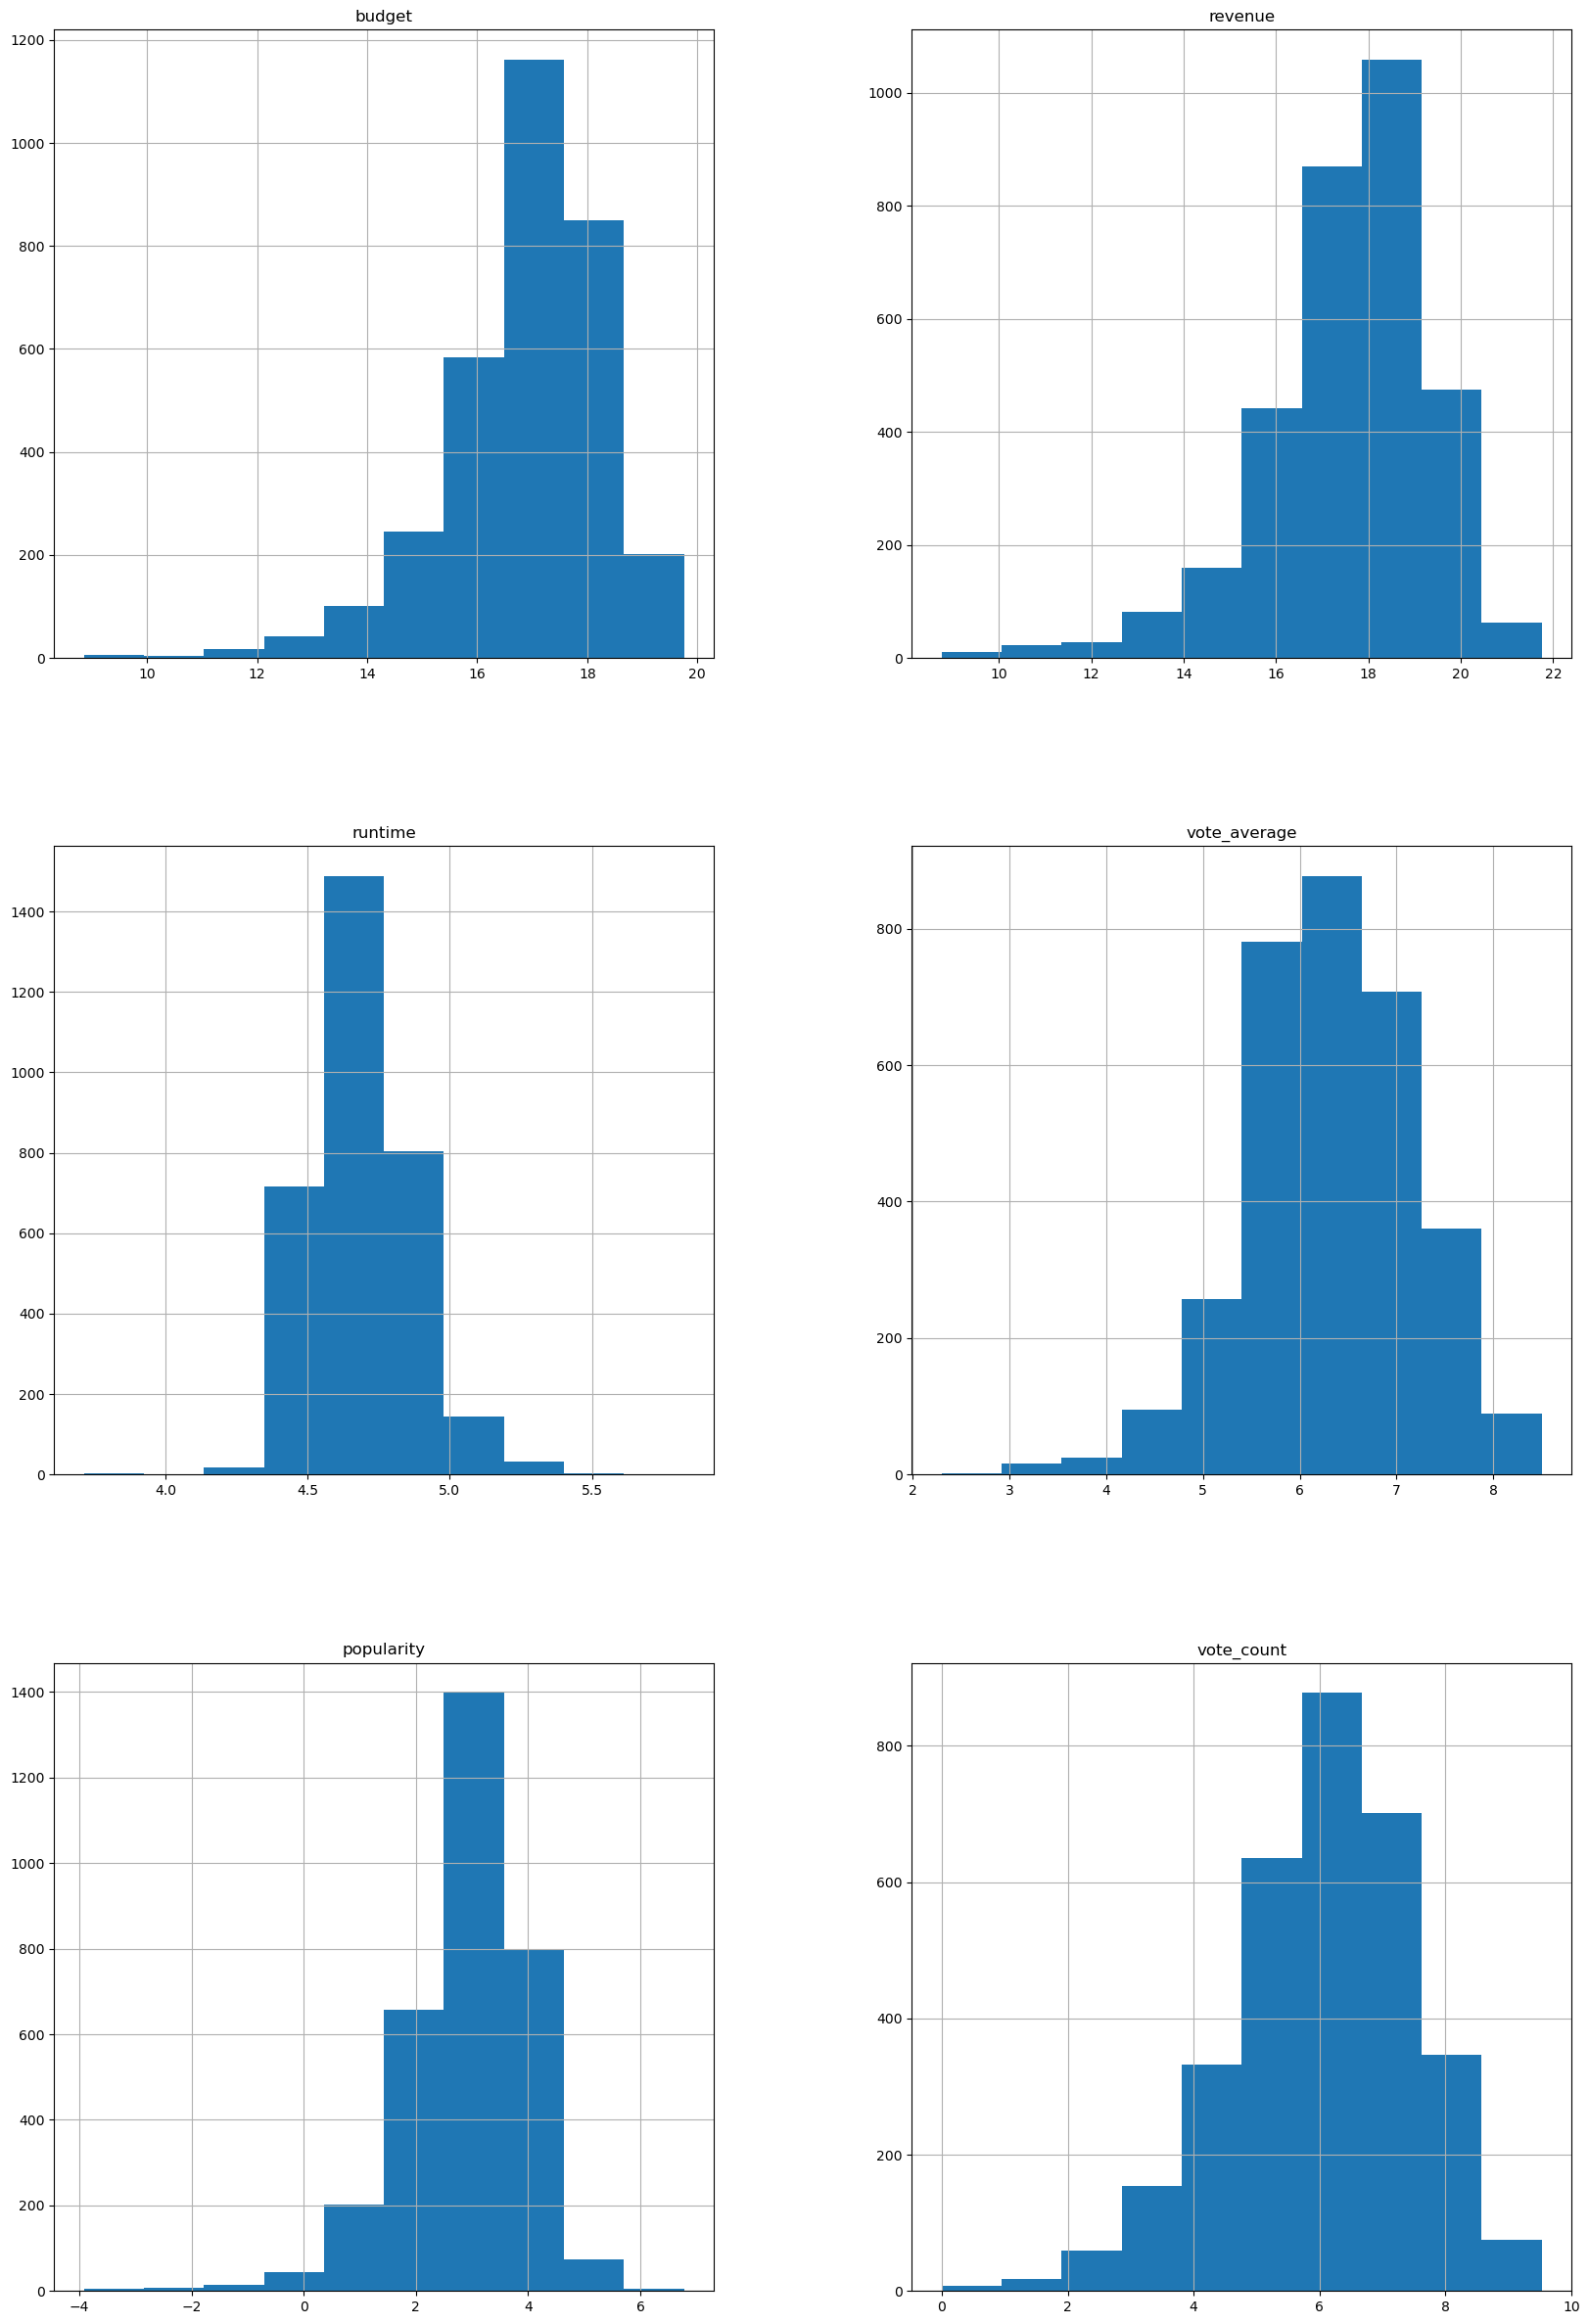

In [45]:
import matplotlib.pyplot as plt
import numpy as np

move_ds: DataFrame = movie[['budget', 'genres', 'revenue', 'runtime', 'vote_average', 'popularity', 'vote_count']].copy()
move_ds['genres'] = move_ds['genres'].str.split(pat=' ')
# move_ds = pd.concat([move_ds, move_ds['genres'].str.get_dummies(sep=' ').sum(level=0)])
# move_ds.drop('genres')
move_ds = move_ds[move_ds['budget'] > 1000]
move_ds = move_ds[move_ds['revenue'] > 1000]
move_ds = move_ds[move_ds['vote_average'] > 0]
move_ds = move_ds[move_ds['popularity'] > 0]
move_ds = move_ds[move_ds['genres'].notnull()]
move_ds['popularity'] = np.log(move_ds['popularity'])
move_ds['budget'] = np.log(move_ds['budget'])
move_ds['revenue'] = np.log(move_ds['revenue'])
move_ds['runtime'] = np.log(move_ds['runtime'])
move_ds['vote_count'] = np.log(move_ds['vote_count'])

move_ds_genre = move_ds['genres']


all_genres = np.unique(np.array([genre for s in move_ds['genres'] for genre in s]))

move_ds.hist(figsize=(20, 30))
runtime = move_ds['runtime']

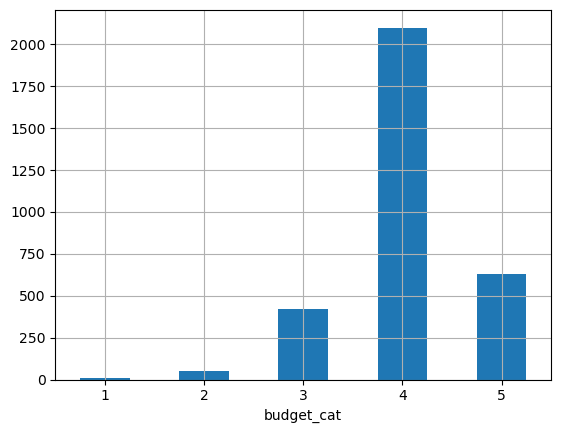

In [35]:
import numpy as np
bin_count = 5
bins = np.append(np.linspace(8, 18, bin_count), [np.inf])
labels = np.array(range(bin_count)) + 1

move_ds['budget_cat'] = pd.cut(move_ds['budget'], bins=bins, labels=labels)
move_ds['budget_cat'].value_counts().sort_index().plot.bar(rot = 0, grid=True)
plt.show()


array([[<Axes: xlabel='budget', ylabel='budget'>,
        <Axes: xlabel='revenue', ylabel='budget'>,
        <Axes: xlabel='runtime', ylabel='budget'>,
        <Axes: xlabel='vote_average', ylabel='budget'>,
        <Axes: xlabel='popularity', ylabel='budget'>],
       [<Axes: xlabel='budget', ylabel='revenue'>,
        <Axes: xlabel='revenue', ylabel='revenue'>,
        <Axes: xlabel='runtime', ylabel='revenue'>,
        <Axes: xlabel='vote_average', ylabel='revenue'>,
        <Axes: xlabel='popularity', ylabel='revenue'>],
       [<Axes: xlabel='budget', ylabel='runtime'>,
        <Axes: xlabel='revenue', ylabel='runtime'>,
        <Axes: xlabel='runtime', ylabel='runtime'>,
        <Axes: xlabel='vote_average', ylabel='runtime'>,
        <Axes: xlabel='popularity', ylabel='runtime'>],
       [<Axes: xlabel='budget', ylabel='vote_average'>,
        <Axes: xlabel='revenue', ylabel='vote_average'>,
        <Axes: xlabel='runtime', ylabel='vote_average'>,
        <Axes: xlabel='vote_ave

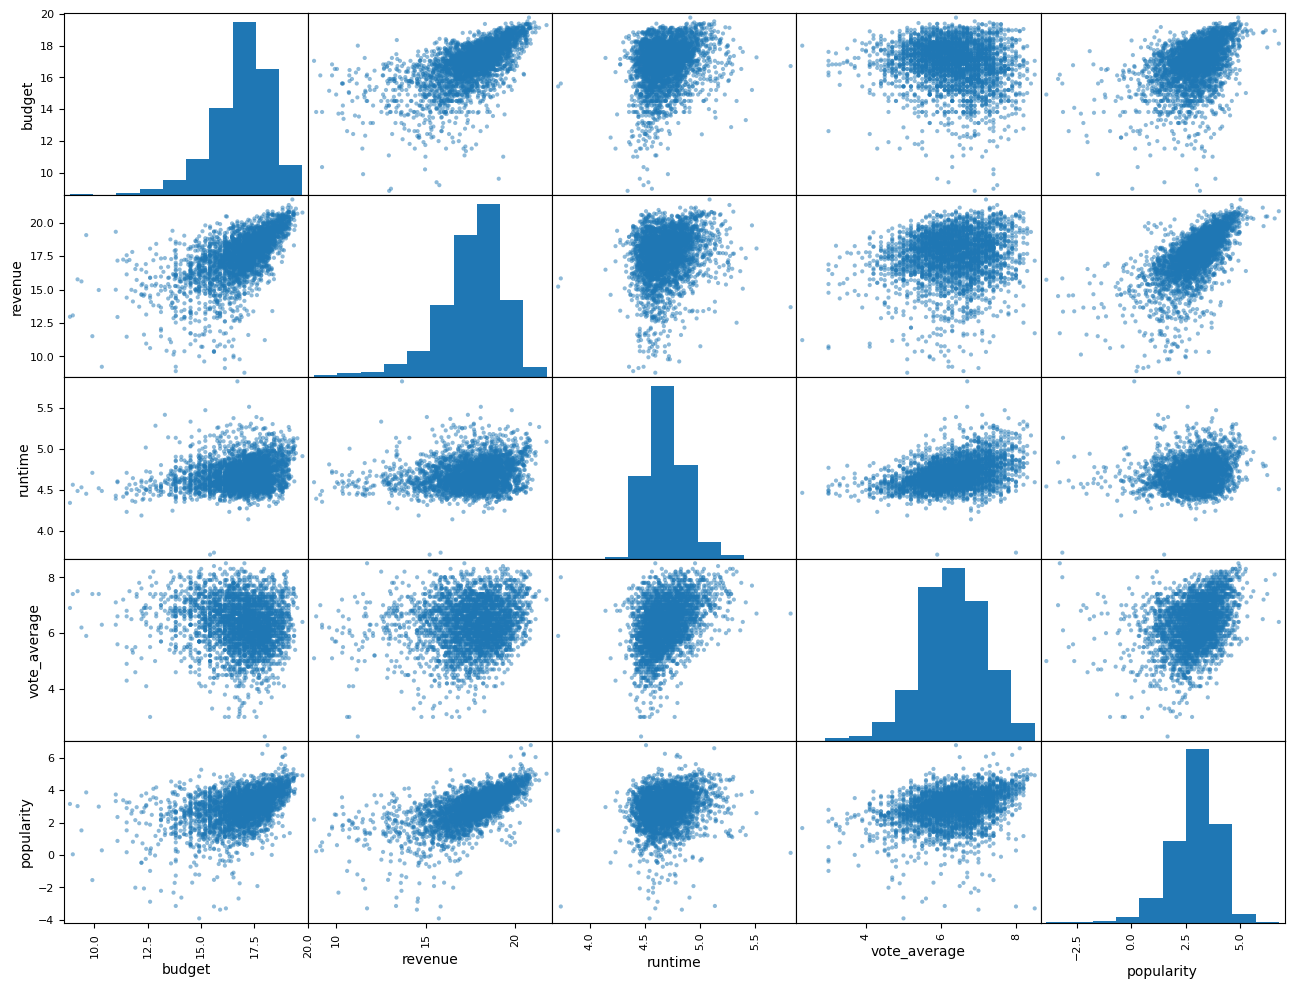

In [36]:
from pandas.plotting import scatter_matrix

num_attrs = ['budget', 'revenue', 'runtime', 'vote_average', 'popularity']
corr_matrix = move_ds[num_attrs].corr()
corr_matrix['vote_average'].sort_values(ascending=False)
scatter_matrix(move_ds[num_attrs], figsize=(40*cm, 30*cm))


In [37]:
from sklearn.preprocessing import MultiLabelBinarizer
move_ds_genre = move_ds['genres']

encoder = MultiLabelBinarizer(classes=all_genres)

move_ds_gnere_1hot = encoder.fit_transform(move_ds_genre)
genre_matrix = DataFrame(move_ds_gnere_1hot, columns=all_genres)
if all_genres[0] not in move_ds.columns:
    move_ds = move_ds.join(genre_matrix)

move_ds


,budget,genres,revenue,runtime,vote_average,popularity,vote_count,budget_cat,Action,Adventure,...,Foreign,History,Horror,Music,Mystery,Romance,Science,Thriller,War,Western
0,19.283571,"[Action, Adventure, Fantasy, Science, Fiction]",21.748578,5.087596,7.2,5.013548,9.375855,5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19.519293,"[Adventure, Fantasy, Action]",20.683485,5.129899,6.9,4.935068,8.411833,5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19.316769,"[Action, Adventure, Crime]",20.596199,4.997212,6.3,4.676344,8.404248,5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.336971,"[Action, Crime, Drama, Thriller]",20.804790,5.105945,7.6,4.721289,9.116689,5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.376192,"[Action, Adventure, Science, Fiction]",19.464974,4.882802,6.1,3.782529,7.661056,5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,10.203592,[Comedy],14.963272,4.521789,7.4,2.983086,6.626718,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4788,9.392662,"[Horror, Comedy, Crime]",15.607270,4.532599,6.2,1.515928,4.700480,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4792,9.903488,"[Crime, Horror, Mystery, Thriller]",11.502875,4.709530,7.4,-1.549082,4.143135,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4796,8.853665,"[Science, Fiction, Drama, Thriller]",12.959280,4.343805,6.9,3.148794,6.489205,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:

from sklearn.model_selection._split import train_test_split
from pandas import DataFrame

train_df: DataFrame = move_ds.copy()
label_df: DataFrame = move_ds[['revenue']]
train_set_template, test_set = train_test_split(train_df, test_size=0.2, stratify=move_ds["budget_cat"], random_state=42)

for set in (train_set_template, test_set):
    set.drop('budget_cat', axis=1, inplace=True)
    set.drop('genres', axis=1, inplace=True)

train_set: DataFrame= train_set_template.copy()


<Axes: xlabel='budget', ylabel='vote_average'>

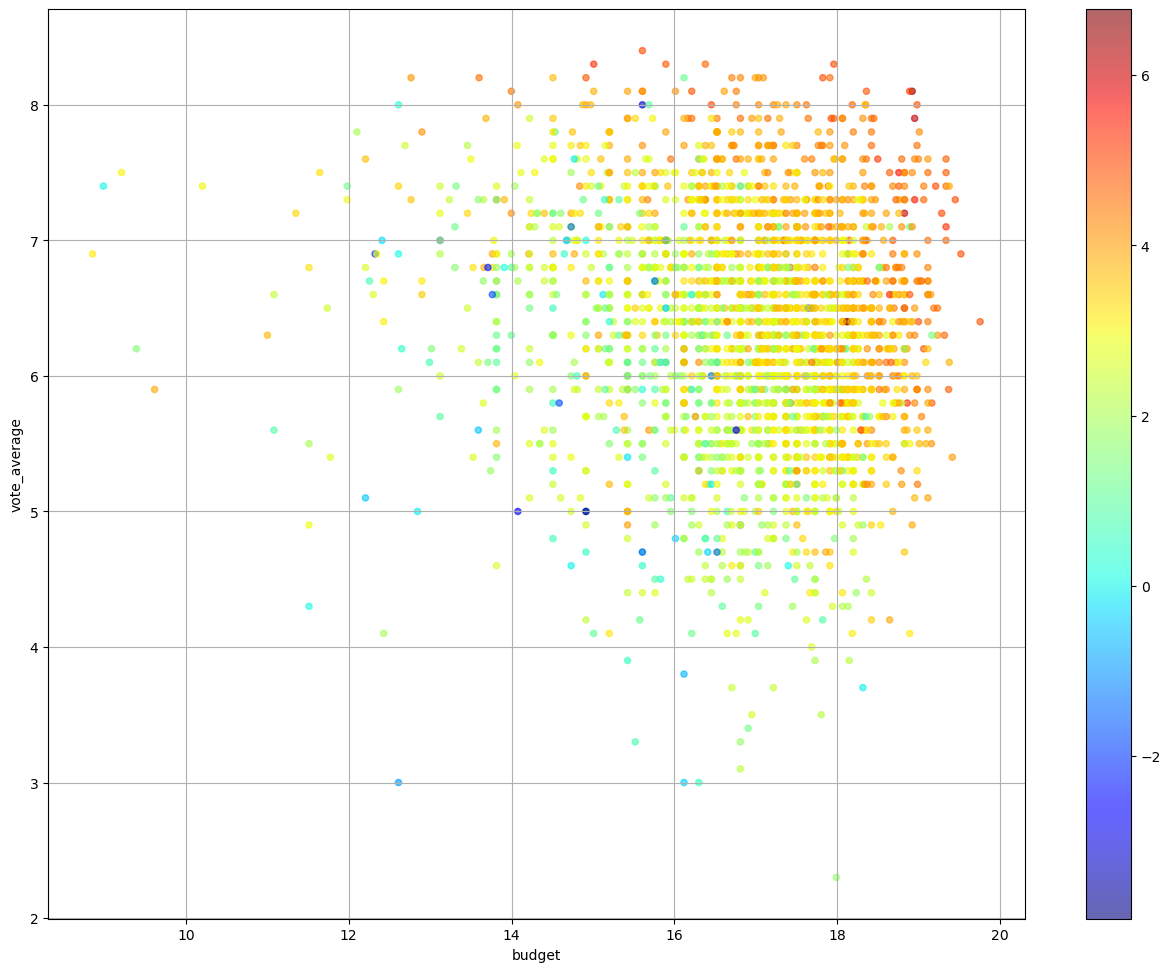

In [39]:

cm = 1/2.54
train_set.plot(kind='scatter', x='budget', y='vote_average', c=train_set['popularity'], cmap='jet',
               alpha=0.6, grid=True, figsize=(40*cm, 30*cm))

In [43]:
from sklearn.tree import DecisionTreeRegressor




,revenue
0,21.748578
1,20.683485
2,20.596199
3,20.804790
4,19.464974
...,...
4773,14.963272
4788,15.607270
4792,11.502875
4796,12.959280
